<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Install

In [3]:
! pip install min-dalle
! nvidia-smi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Tue Jul  5 00:03:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+-------------

### Load Model

In [4]:
from PIL import Image
from IPython.display import update_display
import numpy
from math import log2
from min_dalle import MinDalle

model = MinDalle(is_mega=True, is_reusable=True)

initializing MinDalle
intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer


### Generate Images
Note: reduce the grid size if you run out of GPU memory.  4x4 has been tested to work on T4 and P100 (with intermediate_image_count = 1)

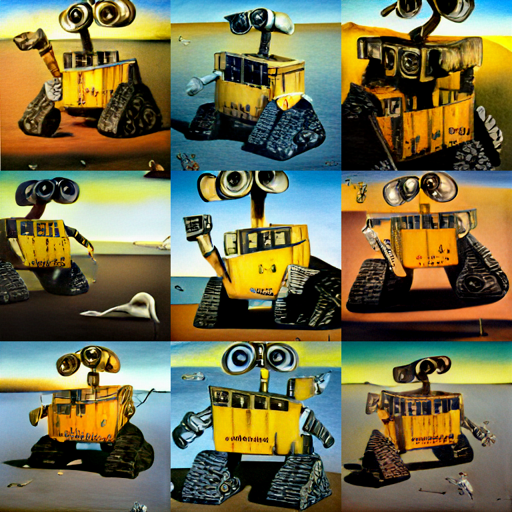

CPU times: user 33.5 s, sys: 556 ms, total: 34 s
Wall time: 34.8 s


In [5]:
%%time

text = "Dali painting of WALL·E" #@param {type:"string"}
grid_size = 3 #@param {type:"integer"}
seed = -1 #@param {type:"integer"}
intermediate_image_count = 8 #@param ["1", "2", "4", "8", "16"] {type:"raw"}
display_size = 512 #@param {type:"integer"}

image_stream = model.generate_image_stream(
    text,
    seed,
    grid_size,
    log2(intermediate_image_count)
)

image_shape = (display_size, display_size, 3)
zero_image = Image.fromarray(numpy.zeros(image_shape, dtype=numpy.uint8))
display(zero_image, display_id=1)

for image in image_stream:
    image = image.resize((display_size, display_size))
    update_display(image, display_id=1)